In [1]:
import argparse
import os
import pickle
import sys
import cv2
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
# from gta_utils import LIMBS, read_depthmap
# from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
import glob
# from utils import *
import copy
import argparse

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from unittest.mock import Mock
args = Mock()
args.data_root = '../GTA-1M/FPS-30'
args.sequence_id = '2020-05-20-21-13-13'

In [3]:
info = pickle.load(open(os.path.join(args.data_root, args.sequence_id, 'info_frames.pickle'), 'rb'))
info_npz = np.load(os.path.join(args.data_root, args.sequence_id, 'info_frames.npz'))

In [4]:
type(info)
len(info)  # 7174 frames
frame = info[1]

list

7174

In [8]:
keys = list(frame.keys())
len(keys)
keys[:7]

# only ever use cam_near_clip, cam_far_clip (if it's in the keys)
# frame['cam_near_clip']
frame['cam_near_clip']

38

['time_since_player_hit_vehicle',
 'time_since_player_hit_ped',
 'time_since_player_drove_on_pavement',
 'time_since_player_drove_against_traffic',
 'position',
 'forward_vector',
 'heading']

0.15

In [6]:
info_npz.files

['joints_2d',
 'joints_3d_cam',
 'joints_3d_world',
 'world2cam_trans',
 'intrinsics']

In [24]:
info_npz['joints_2d'].shape
info_npz['joints_3d_cam'].shape
info_npz['joints_3d_world'].shape
info_npz['world2cam_trans'].shape
info_npz['intrinsics'].shape

(7174, 21, 2)

(7174, 21, 3)

(7174, 21, 3)

(7174, 4, 4)

(7174, 3, 3)

In [28]:
info_npz['joints_3d_cam'][0]

array([[-3.99268043e-01, -5.57384163e-01,  2.37011002e+00],
       [-3.87507203e-01, -4.78958571e-01,  2.45071970e+00],
       [-4.12958797e-01, -4.31811765e-01,  2.43071643e+00],
       [-5.71415609e-01, -3.88806623e-01,  2.50903313e+00],
       [-6.33770874e-01, -1.50383676e-01,  2.62917514e+00],
       [-6.48610792e-01,  1.05727569e-01,  2.66611964e+00],
       [-3.49800067e-01, -4.40915596e-01,  2.43062093e+00],
       [-1.86794363e-01, -4.51703470e-01,  2.51068334e+00],
       [-9.13740933e-02, -2.26623621e-01,  2.63480977e+00],
       [-2.79279064e-02,  2.43037938e-02,  2.64878672e+00],
       [-3.55254396e-01, -2.56343840e-01,  2.55627753e+00],
       [-3.44239252e-01, -1.53658090e-01,  2.60189830e+00],
       [-3.38668394e-01, -7.87498362e-02,  2.64362259e+00],
       [-3.33603703e-01, -2.66577578e-03,  2.68083765e+00],
       [-3.32513670e-01,  1.85229615e-02,  2.67929909e+00],
       [-4.24634727e-01,  9.04778474e-02,  2.71054059e+00],
       [-4.09039024e-01,  4.55251196e-01

In [9]:
keys

['time_since_player_hit_vehicle',
 'time_since_player_hit_ped',
 'time_since_player_drove_on_pavement',
 'time_since_player_drove_against_traffic',
 'position',
 'forward_vector',
 'heading',
 'cam_pos',
 'cam_rot',
 'cam_near_clip',
 'cam_field_of_view',
 'head',
 'neck',
 'right_clavicle',
 'right_shoulder',
 'right_elbow',
 'right_wrist',
 'left_clavicle',
 'left_shoulder',
 'left_elbow',
 'left_wrist',
 'spine0',
 'spine1',
 'spine2',
 'spine3',
 'spine4',
 'right_hip',
 'right_knee',
 'right_ankle',
 'left_hip',
 'left_knee',
 'left_ankle',
 'kpname',
 'kpvalue',
 'status',
 'time',
 'rgb_path',
 'depth_path']

In [12]:
foo = np.load(os.path.join(args.data_root, "preprocessed_data", args.sequence_id, "depth_inpaint_npy", 'seq_0001_fr_00027.npy'))

In [13]:
foo.shape

(256, 448)

In [23]:
joints_2d = info_npz['joints_2d']
joints_2d.shape

(7174, 21, 2)

In [17]:
diffs = joints_2d[1:] - joints_2d[0:-1]
diff_norms = np.linalg.norm(diffs, axis=(1, 2))

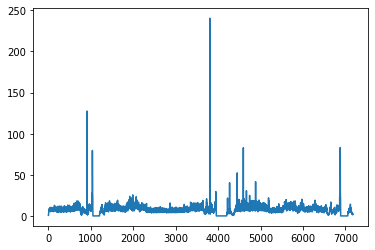

In [25]:
plt.plot(diff_norms)

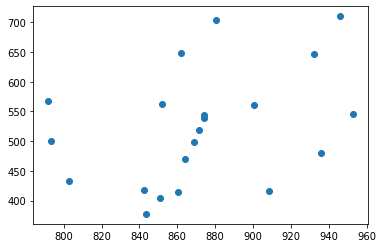

In [28]:
plt.scatter(joints_2d[0][:, 0], joints_2d[0][:, 1])